In [1]:
# Import the custom library
import graph_algorithms as ga

# Tree search

In [2]:
game_tree = {
    'n0': ['n1'],
    'n1': ['n2', 'n3'],
    'n2': ['n9', 'n10'],
    'n3': ['n4'],
    'n4': ['n5'],
    'n5': ['n6'],
    'n6': ['n7'],
    'n7': ['n8'],
    'n8': [],
    'n9': [],
    'n10': []
}

start_node = 'n0'
goal_node = 'n8'

## Breadth-first search (FIFO)

Goal n8 reached! Path: ['n0', 'n1', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
    Iteration Node          Queue
0           1   n0           [n1]
1           2   n1       [n2, n3]
2           3   n2  [n3, n9, n10]
3           4   n3  [n9, n10, n4]
4           5   n9      [n10, n4]
5           6  n10           [n4]
6           7   n4           [n5]
7           8   n5           [n6]
8           9   n6           [n7]
9          10   n7           [n8]
10         11   n8             []


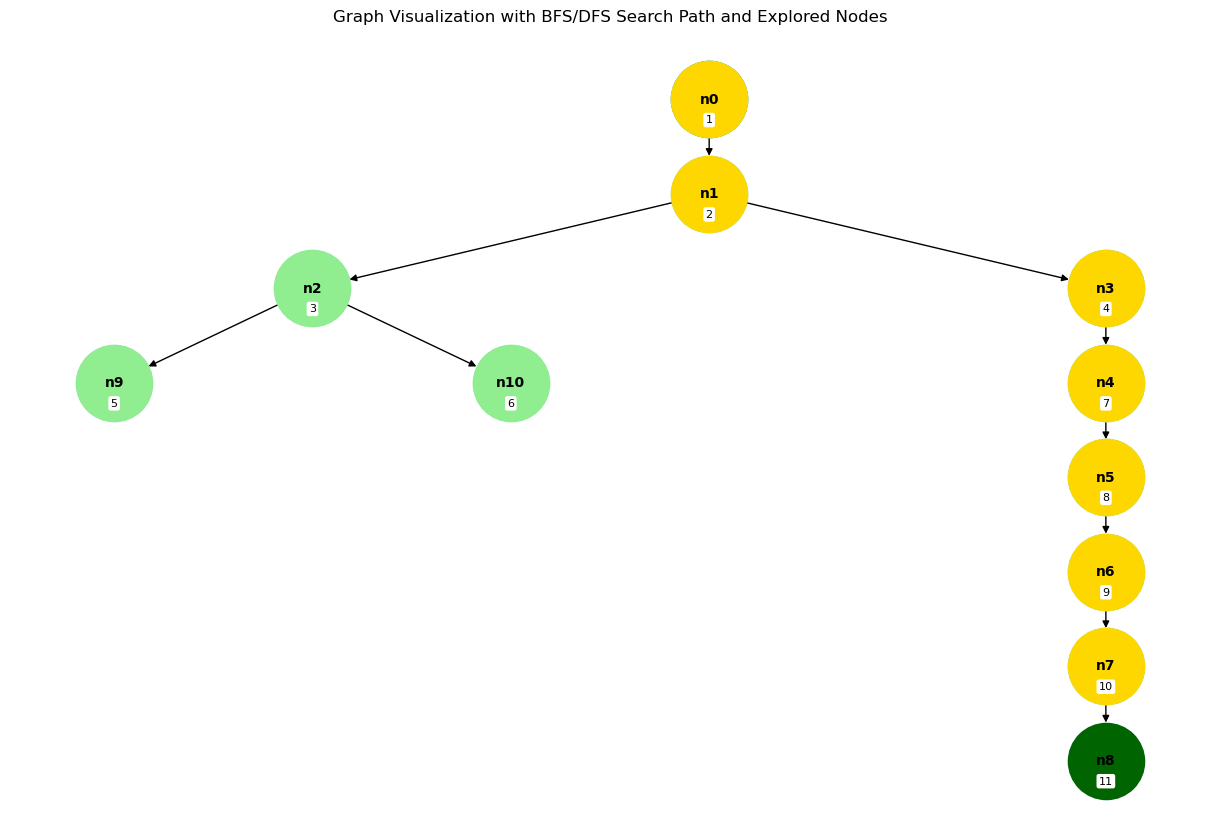

In [3]:
# Perform BFS
bfs_path, bfs_explored, bfs_df = ga.bfs(game_tree, start_node, goal_node)

# Display the DataFrame
print(bfs_df)

# Visualize BFS
ga.visualize_search(game_tree, start_node, goal_node, bfs_path, bfs_explored)


## Depth-first search (LIFO)

Goal n8 reached! Path: ['n0', 'n1', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
   Iteration Node     Stack
0          1   n0      [n1]
1          2   n1  [n2, n3]
2          3   n3  [n2, n4]
3          4   n4  [n2, n5]
4          5   n5  [n2, n6]
5          6   n6  [n2, n7]
6          7   n7  [n2, n8]
7          8   n8      [n2]


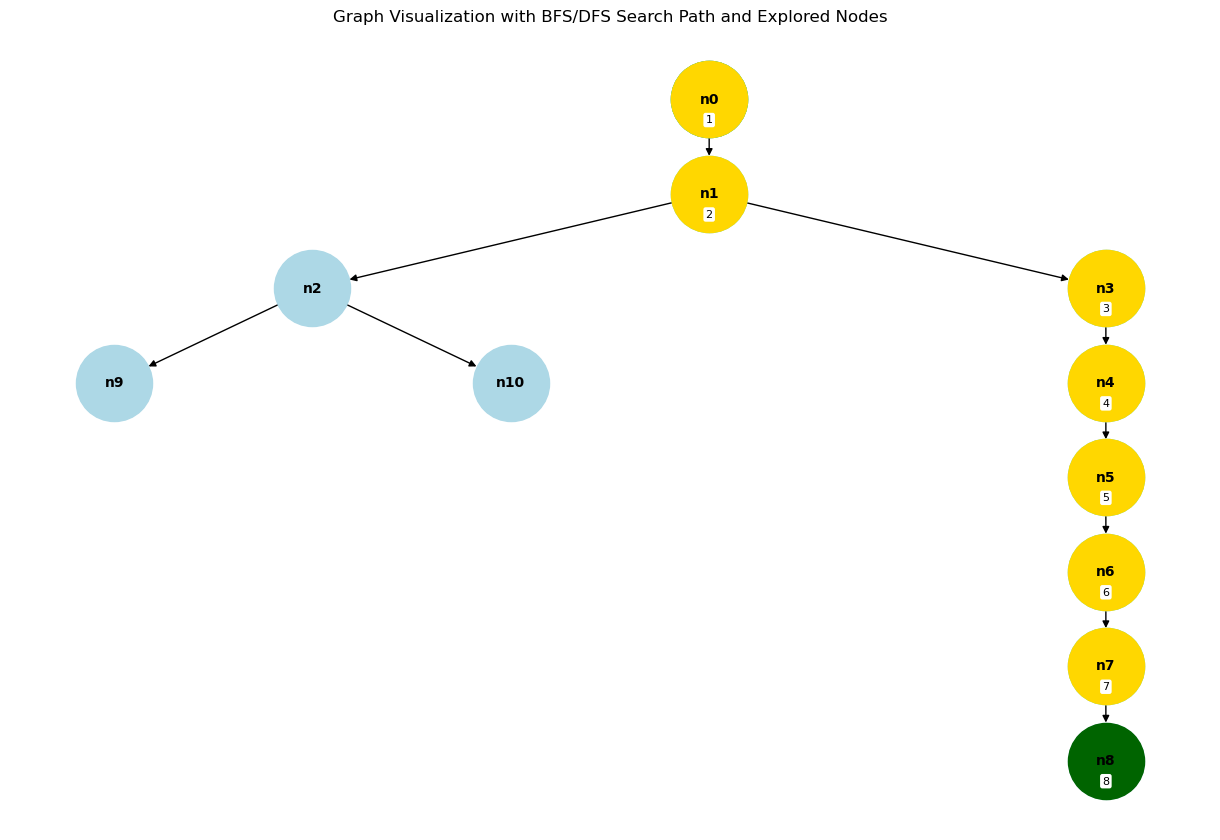

In [4]:
# Perform DFS
dfs_path, dfs_explored, dfs_df = ga.dfs(game_tree, start_node, goal_node)

# Display the DataFrame
print(dfs_df)

# Visualize DFS
ga.visualize_search(game_tree, start_node, goal_node, dfs_path, dfs_explored)

## GBFS with tree search (don't remeber the visited nodes)

### Graph definition

In [5]:
# Example usage
graph = {
    's0': {'s1': 1, 's3': 1},
    's1': {'s0': 1, 's2': 1},
    's2': {'s1': 1},
    's3': {'s0': 1, 's4': 1},
    's4': {'s3': 1, 's6': 1},
    's6': {'s4': 1, 's7': 1},
    's7': {'s6': 1},
}

heuristics = {
    's0': 6,
    's1': 4,
    's2': 2,
    's3': 10,
    's4': 7,
    's6': 4,
    's7': 0,
}

start_node = 's0'
goal_nodes = {'s7'}

#### Resolution

Goal not reached within max iterations.
    Iteration Node                                              Queue
0           1   s0                                [(4, s1), (10, s3)]
1           2   s1                       [(2, s2), (10, s3), (6, s0)]
2           3   s2                       [(4, s1), (10, s3), (6, s0)]
3           4   s1              [(2, s2), (6, s0), (6, s0), (10, s3)]
4           5   s2              [(4, s1), (6, s0), (6, s0), (10, s3)]
5           6   s1     [(2, s2), (6, s0), (6, s0), (10, s3), (6, s0)]
6           7   s2     [(4, s1), (6, s0), (6, s0), (10, s3), (6, s0)]
7           8   s1  [(2, s2), (6, s0), (6, s0), (10, s3), (6, s0),...
8           9   s2  [(4, s1), (6, s0), (6, s0), (10, s3), (6, s0),...
9          10   s1  [(2, s2), (6, s0), (6, s0), (10, s3), (6, s0),...
10         11   s2  [(4, s1), (6, s0), (6, s0), (10, s3), (6, s0),...
11         12   s1  [(2, s2), (6, s0), (6, s0), (6, s0), (6, s0), ...
12         13   s2  [(4, s1), (6, s0), (6, s0), (6

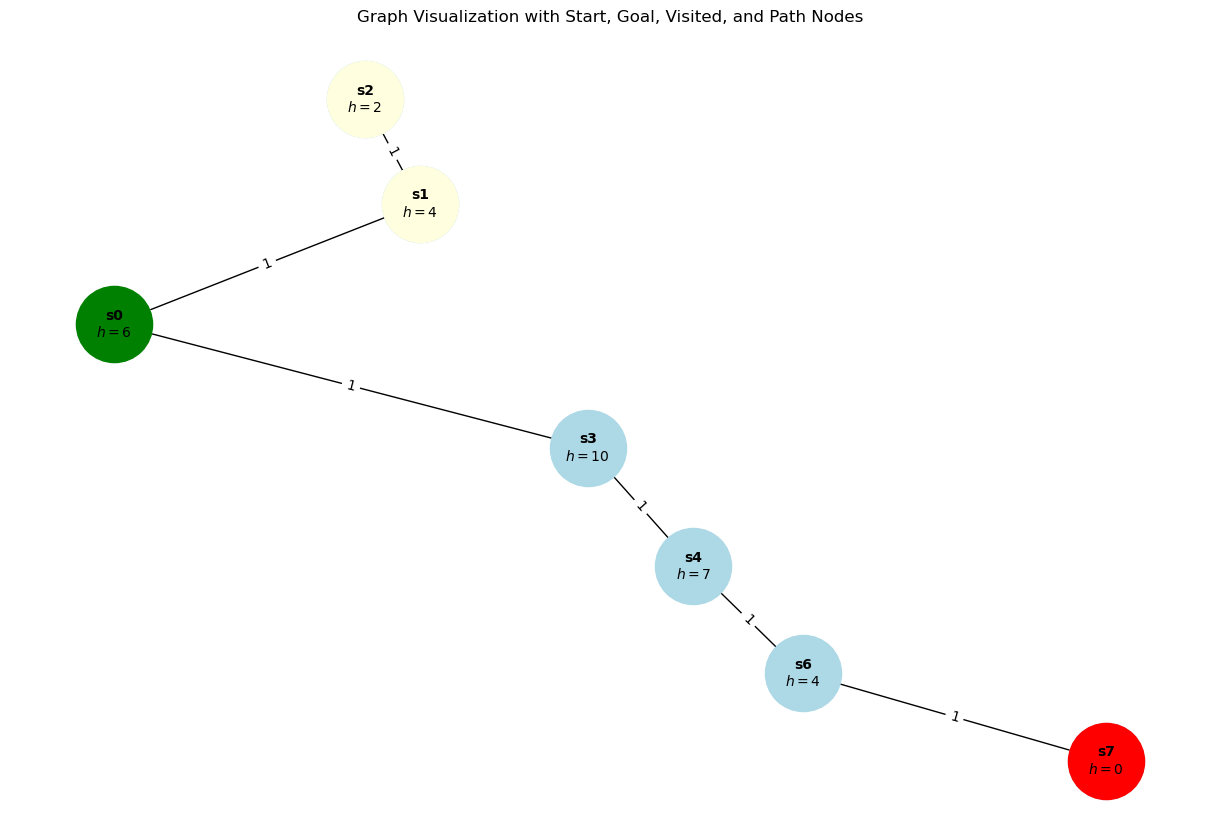

In [6]:
# Perform GBFS with tree-like behavior
gbfs_tree_path, gbfs_tree_visited, gbfs_tree_df = ga.gbfs_tree(graph, heuristics, start_node, goal_nodes)

# Display the DataFrame
print(gbfs_tree_df)

# Visualize GBFS Tree
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, visited_nodes=gbfs_tree_visited, path_nodes=gbfs_tree_path)

## A* with tree search (don't remeber visited nodes)

### Graph definition

In [ ]:
# Example usage
graph = {
    's0': {'s1': 1, 's3': 1},
    's1': {'s0': 1, 's2': 1},
    's2': {'s1': 1},
    's3': {'s0': 1, 's4': 1},
    's4': {'s3': 1, 's6': 1},
    's6': {'s4': 1, 's7': 1},
    's7': {'s6': 1},
}

heuristics = {
    's0': 6,
    's1': 4,
    's2': 2,
    's3': 10,
    's4': 7,
    's6': 4,
    's7': 0,
}

start_node = 's0'
goal_nodes = {'s7'}

### Resolution

In [ ]:
# Perform A* with tree-like behavior
astar_tree_path, astar_tree_visited, astar_tree_df = ga.astar_tree(graph, heuristics, start_node, goal_nodes)

# Display the DataFrame
print(astar_tree_df)

# Visualize A* Tree
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, visited_nodes=astar_tree_visited, path_nodes=astar_tree_path)

# Graph search

## UCS (Uniform Cost Search)

UCS is an extension of BFS. Instead of expanding the shallowest node, UCS expands the node n with the lowest path-cost g(n).

### Graph definition

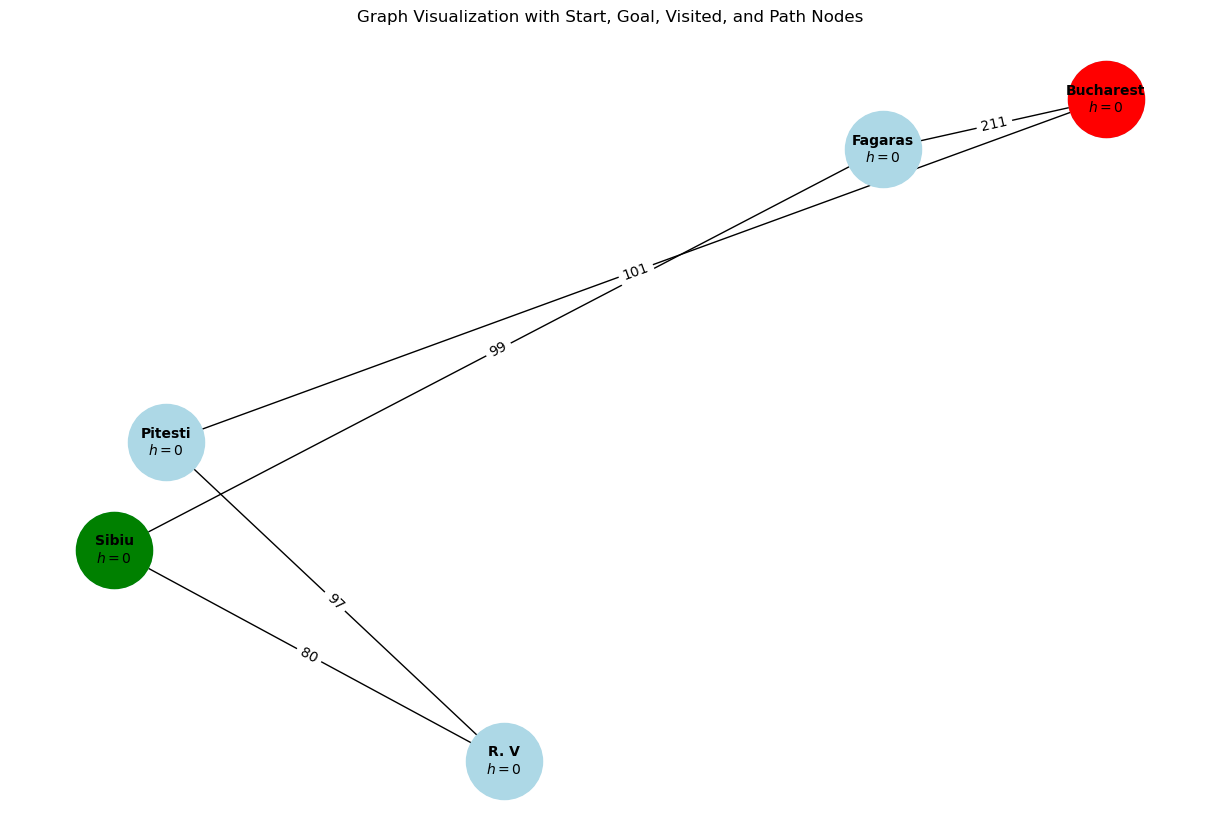

In [7]:
# Define the graph
graph = {
    'Sibiu': {'Fagaras': 99, 'R. V': 80},
    'Fagaras': {'Bucharest': 211, 'Sibiu': 99},
    'R. V': {'Pitesti': 97, 'Sibiu': 80},
    'Pitesti': {'Bucharest': 101, 'R. V': 97},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101}
}

heuristics = {
    'Sibiu': 0,
    'Fagaras': 0,
    'R. V': 0,
    'Pitesti': 0,
    'Bucharest': 0      
}

start_node = 'Sibiu'
goal_nodes = {'Bucharest'}

# Visualize the graph
ga.visualize_graph(graph, heuristics, start_node, goal_nodes)

### Resolution

Goal Bucharest reached! Path: ['Sibiu', 'R. V', 'Pitesti', 'Bucharest'], Cost: 278
   Iteration       Node                                 Queue
0          1      Sibiu           [(80, R. V), (99, Fagaras)]
1          2       R. V       [(99, Fagaras), (177, Pitesti)]
2          3    Fagaras    [(177, Pitesti), (310, Bucharest)]
3          4    Pitesti  [(278, Bucharest), (310, Bucharest)]
4          5  Bucharest                    [(310, Bucharest)]


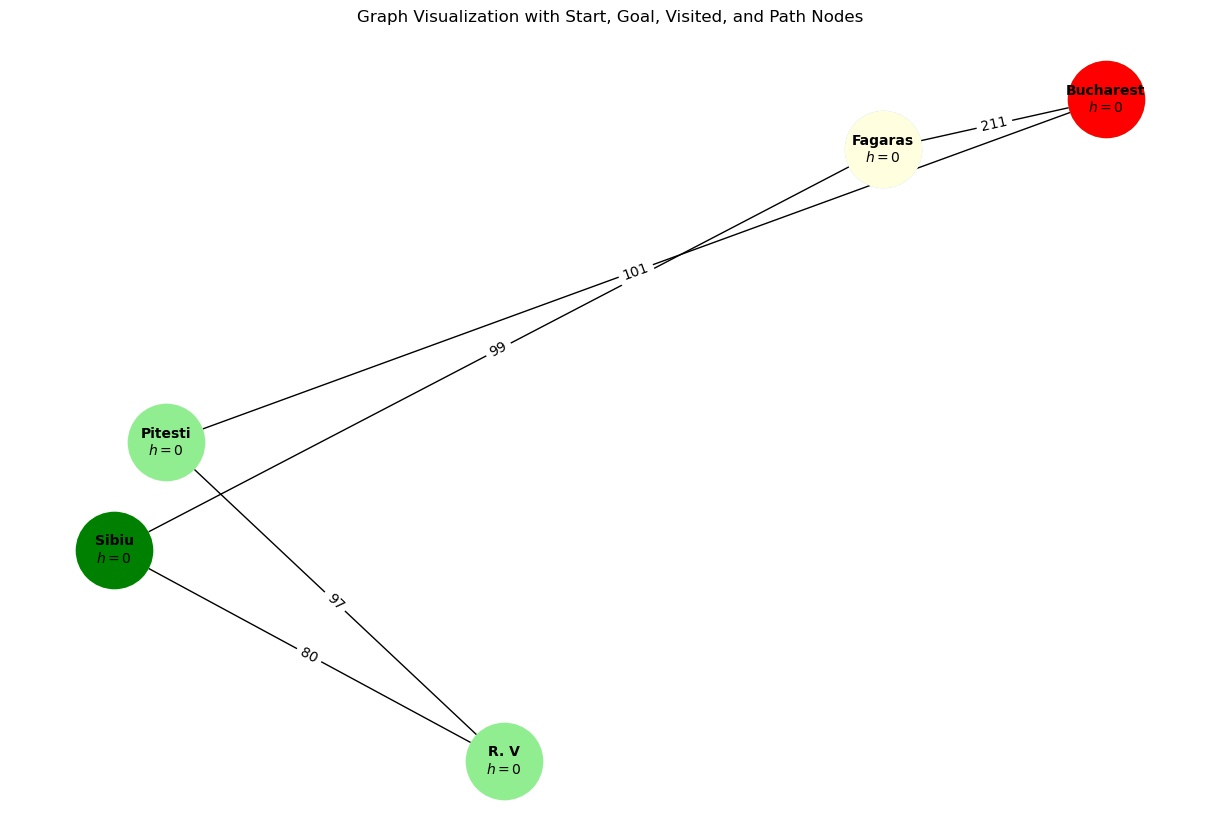

In [8]:
# Perform UCS
ucs_path, ucs_visited, ucs_df = ga.ucs(graph, start_node, goal_nodes)

# Display the DataFrame
print(ucs_df)

# Visualize UCS
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, visited_nodes=ucs_visited, path_nodes=ucs_path)

## A* algorithm

A* takes into acount the path cost and the heuristic at each node

### Graph definition

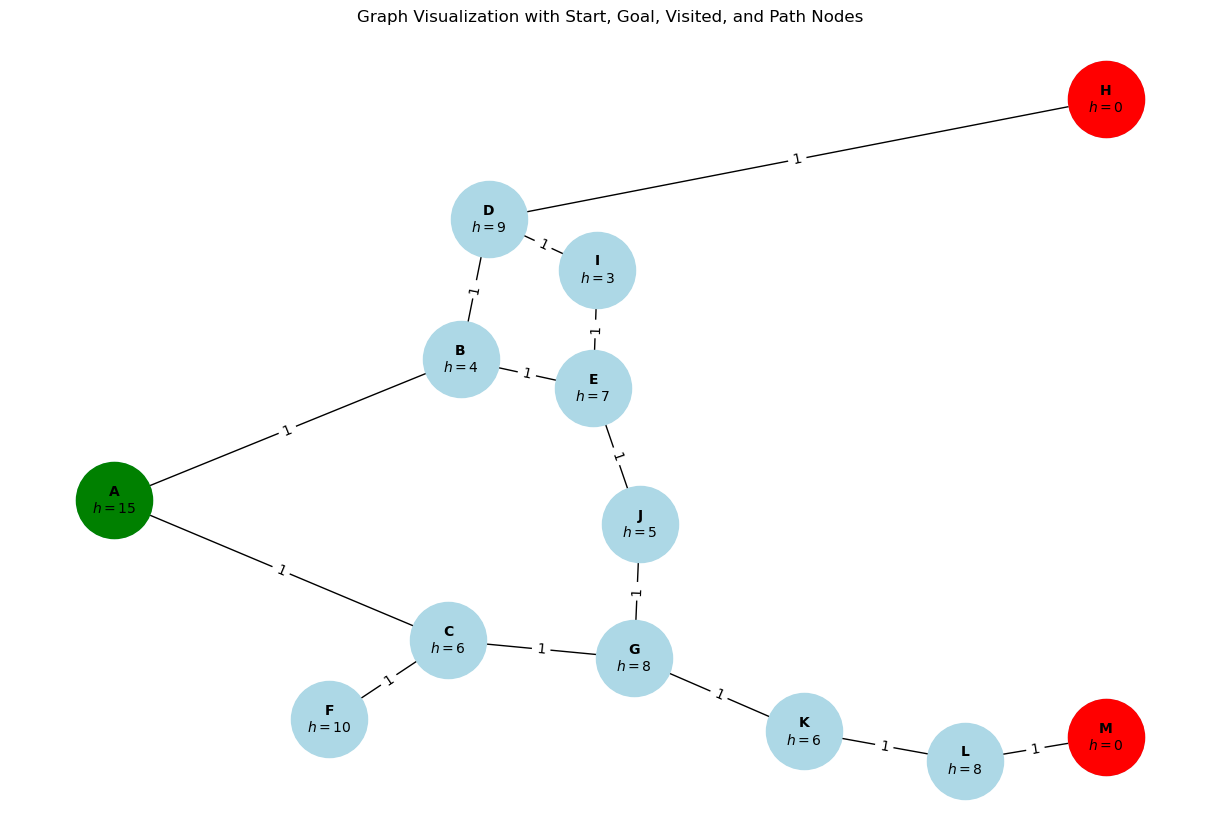

In [9]:
# Define the graph
graph = {
    'A': {'B': 1, 'C': 1},
    'B': {'A': 1, 'E': 1, 'D': 1},
    'C': {'A': 1, 'F': 1, 'G': 1},
    'D': {'B': 1, 'I': 1, 'H': 1},
    'E': {'B': 1, 'I': 1, 'J': 1},
    'F': {'C': 1},
    'G': {'C': 1, 'K': 1, 'J': 1},
    'H': {'D': 1},
    'I': {'D': 1, 'E': 1},
    'J': {'E': 1, 'G': 1},
    'K': {'G': 1, 'L': 1},
    'L': {'K': 1, 'M': 1},
    'M': {'L': 1}
}

heuristics = {
    'A': 15,
    'B': 4,
    'C': 6,
    'D': 9,
    'E': 7,
    'F': 10,
    'G': 8,
    'H': 0,
    'I': 3,
    'J': 5,
    'K': 6,
    'L': 8,
    'M': 0
}

start_node = 'A'
goal_nodes = {'H', 'M'}

# Visualize the graph
ga.visualize_graph(graph, heuristics, start_node, goal_nodes)

### Resolution

Goal H reached! Path: ['A', 'B', 'D', 'H'], Cost: 3
   Iteration Node                                          Queue
0          1    A                               [(5, B), (7, C)]
1          2    B                      [(7, C), (9, E), (11, D)]
2          3    C            [(9, E), (10, G), (12, F), (11, D)]
3          4    E    [(6, I), (8, J), (12, F), (11, D), (10, G)]
4          5    I   [(8, J), (10, G), (12, F), (11, D), (13, D)]
5          6    J  [(10, G), (11, D), (12, F), (13, D), (12, G)]
6          7    G   [(9, K), (11, D), (12, F), (13, D), (12, G)]
7          8    K  [(11, D), (12, G), (12, F), (13, D), (12, L)]
8          9    D   [(3, H), (12, F), (12, L), (13, D), (12, G)]
9         10    H           [(12, F), (12, G), (12, L), (13, D)]


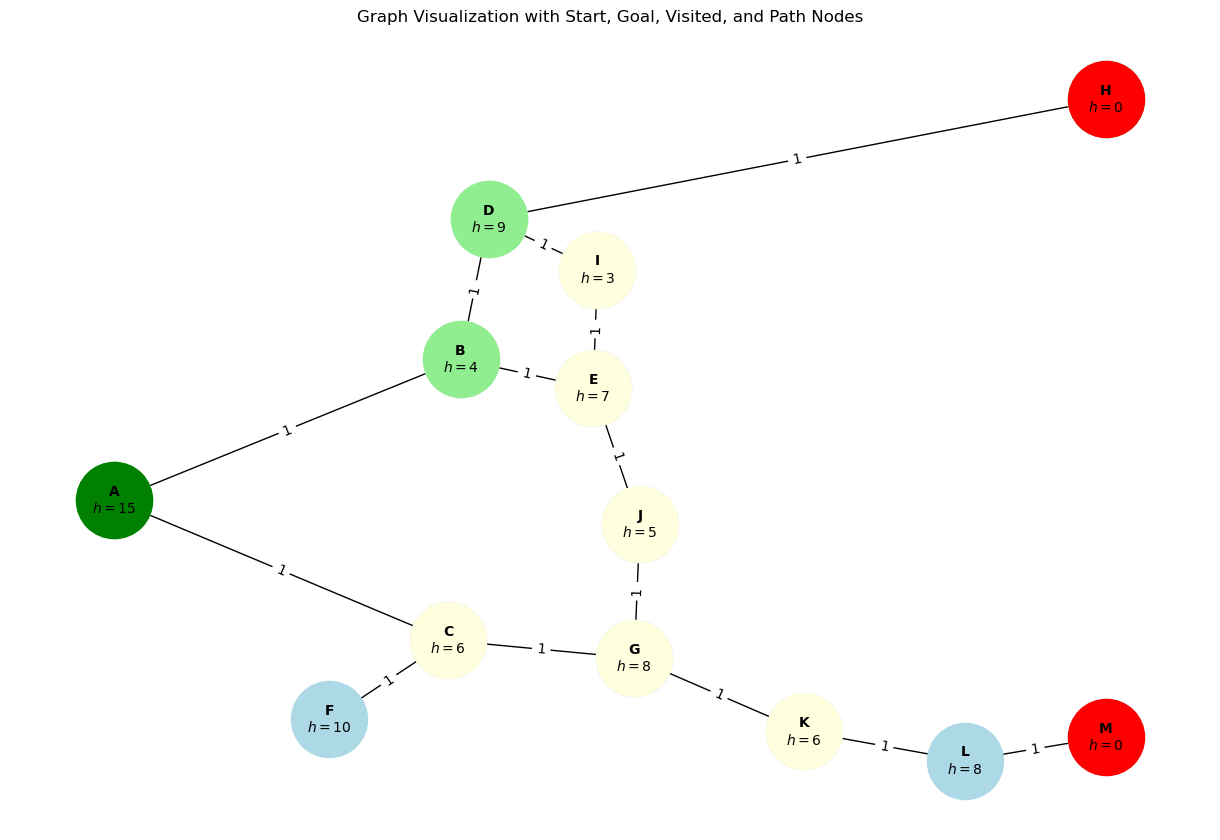

In [10]:
# Perform A*
astar_path, astar_visited, astar_df = ga.astar(graph, heuristics, start_node, goal_nodes)

# Display the DataFrame
print(astar_df)

# Visualize A*
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, visited_nodes=astar_visited, path_nodes=astar_path)

## GBFS algorithm

GBFS expands the node that is closest to the goal.

### Graph definition

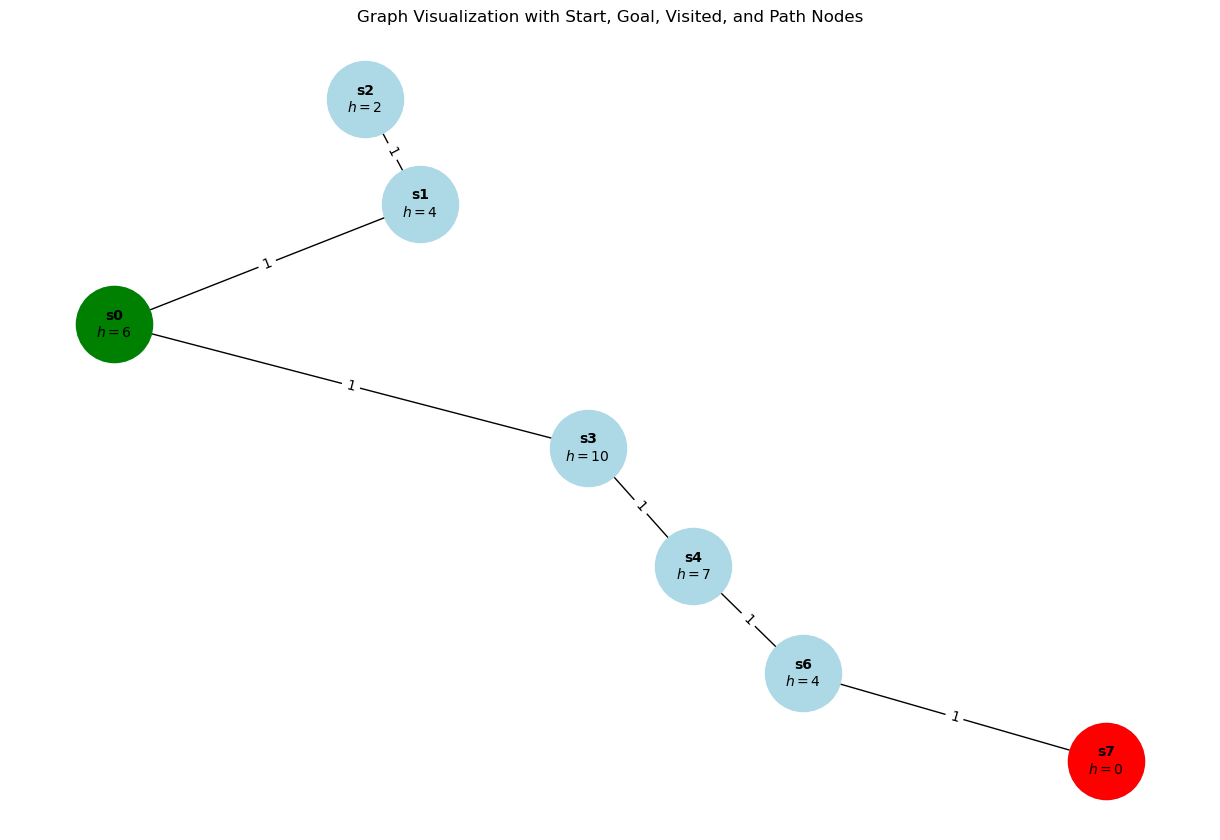

In [11]:
# Define the graph
graph = {
    's0': {'s1': 1, 's3': 1},
    's1': {'s0': 1, 's2': 1},
    's2': {'s1': 1},
    's3': {'s0': 1, 's4': 1},
    's4': {'s3': 1, 's6': 1},
    's6': {'s4': 1, 's7': 1},
    's7': {'s6': 1},
}

heuristics = {
    's0': 6,
    's1': 4,
    's2': 2,
    's3': 10,
    's4': 7,
    's6': 4,
    's7': 0,
}

start_node = 's0'
goal_nodes = {'s7'}

# Visualize the graph
ga.visualize_graph(graph, heuristics, start_node, goal_nodes)

### Resolution

Goal s7 reached! Path: ['s0', 's3', 's4', 's6', 's7']
   Iteration Node                Queue
0          1   s0  [(4, s1), (10, s3)]
1          2   s1  [(2, s2), (10, s3)]
2          3   s2           [(10, s3)]
3          4   s3            [(7, s4)]
4          5   s4            [(4, s6)]
5          6   s6            [(0, s7)]
6          7   s7                   []


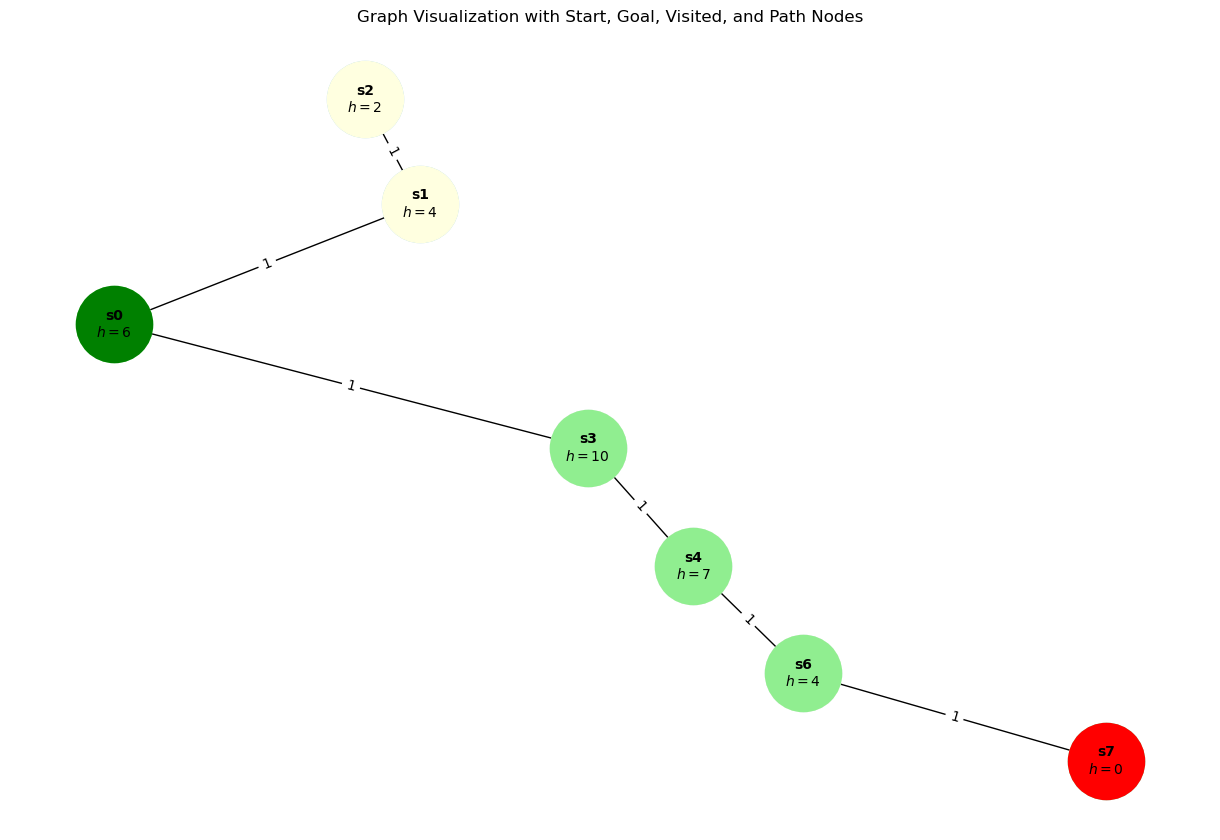

In [12]:
# Perform GBFS
gbfs_path, gbfs_visited, gbfs_df = ga.gbfs(graph, heuristics, start_node, goal_nodes)

# Display the DataFrame
print(gbfs_df)

# Visualize GBFS
ga.visualize_graph(graph, heuristics, start_node, goal_nodes, visited_nodes=gbfs_visited, path_nodes=gbfs_path)

## Admissibility

In [13]:
# Compute shortest path costs and check admissibility
shortest_path_costs = ga.compute_shortest_path_costs(graph, goal_nodes)
is_admissible = ga.check_admissibility(heuristics, shortest_path_costs)
if is_admissible:
    print("The heuristic is admissible.")
else:
    print("The heuristic is not admissible.")

Heuristic is not admissible at node s0: h(n) = 6 > actual cost = 4
Heuristic is not admissible at node s3: h(n) = 10 > actual cost = 3
Heuristic is not admissible at node s4: h(n) = 7 > actual cost = 2
Heuristic is not admissible at node s6: h(n) = 4 > actual cost = 1
The heuristic is not admissible.


# Adversarial search

## Graph definition

In [14]:
# Define the game tree for adversarial search
game_tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O'],
    'H': -1,
    'I': 3,
    'J': 5,
    'K': 8,
    'L': -6,
    'M': -4,
    'N': 10,
    'O': 12
}

## Minimax

The value at the root (A) is: 3
The optimal path is: ['A', 'B', 'D', 'I']


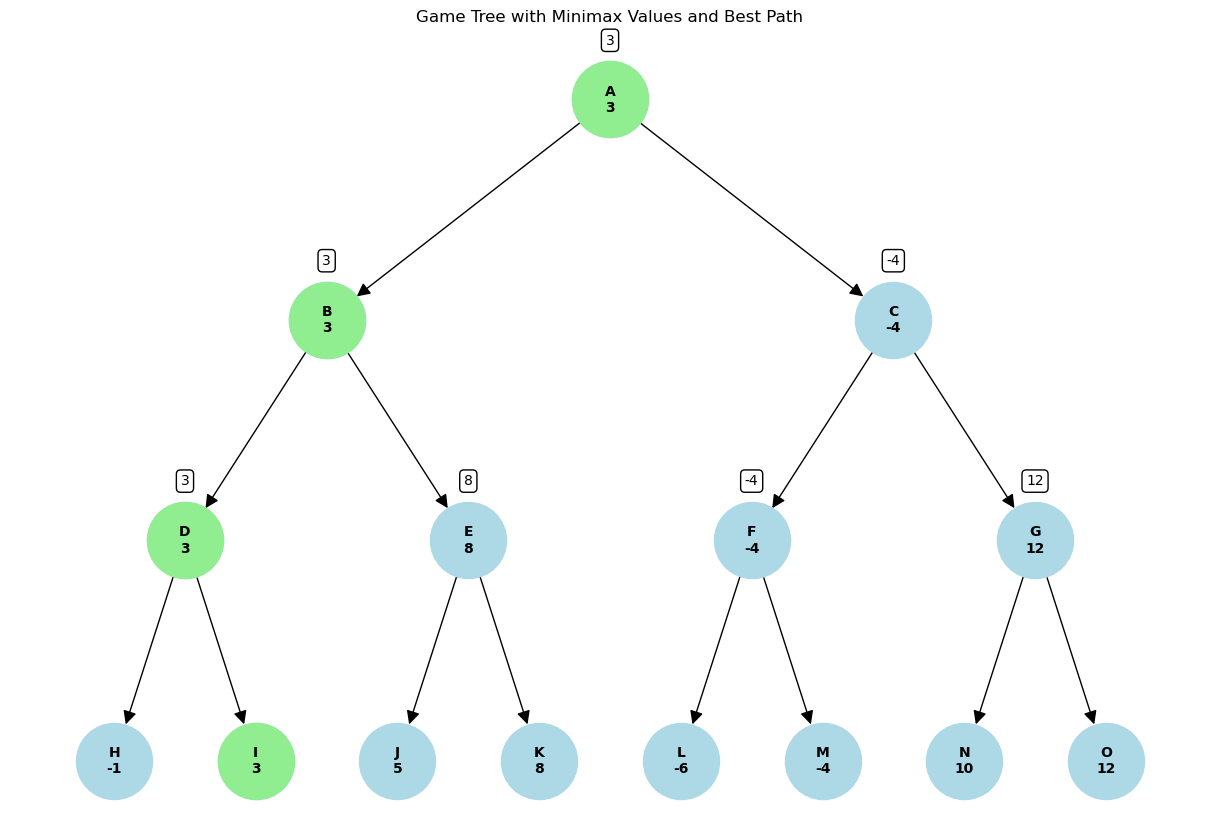

In [15]:
# Define the minimax search parameters
root_node = 'A'
is_maximizing = True  # Set to True if the root is a maximizing player, False if minimizing

# Perform minimax search
values = {}  # Dictionary to store the value at each node
minimax_value, optimal_path = ga.minimax(root_node, 0, is_maximizing, game_tree, values)
print(f"The value at the root ({root_node}) is: {minimax_value}")
print(f"The optimal path is: {optimal_path}")

# Display the Minimax tree
ga.display_minimax_tree(game_tree, values, optimal_path, root=root_node)

## Alpha-beta pruning!

The value at the root (A) is: 3
The optimal path is: ['A', 'B', 'D', 'I']


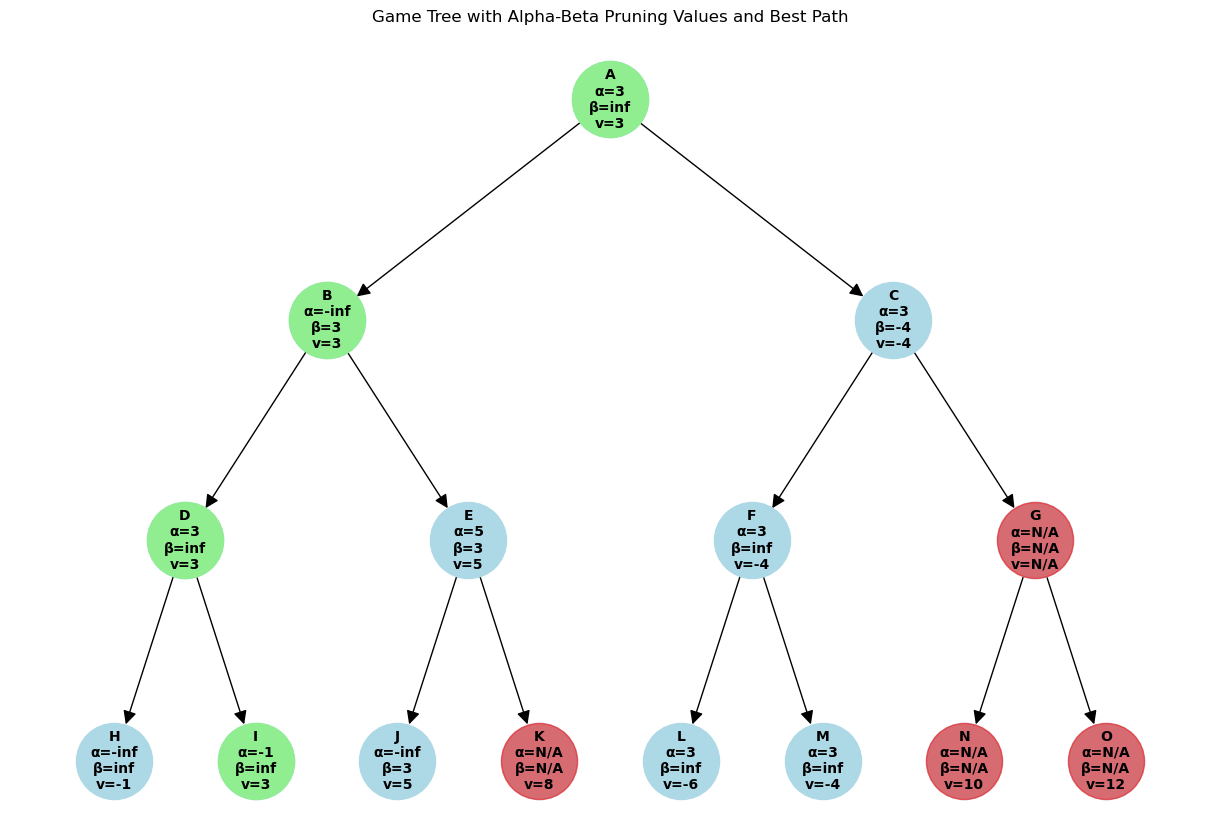

In [16]:
values = {}  # Dictionary to store the value at each node
alpha_values = {}  # Dictionary to store the alpha value at each node
beta_values = {}  # Dictionary to store the beta value at each node
pruned_branches = []  # List to store pruned branches

alpha = float('-inf')
beta = float('inf')

minimax_value, optimal_path = ga.alpha_beta_pruning(root_node, 0, alpha, beta, is_maximizing, game_tree, values, alpha_values, beta_values, pruned_branches)
print(f"The value at the root ({root_node}) is: {minimax_value}")
print(f"The optimal path is: {optimal_path}")

# Display the Alpha-Beta pruning tree
ga.display_alpha_beta_tree(game_tree, values, alpha_values, beta_values, optimal_path, root=root_node)